## Učitavanje biblioteka i paketa

In [1]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from pmlb import fetch_data, classification_dataset_names
from MtLModelAnalysis import *

classifiers = load_algorithms()

test_scores = {name: [] for name in classifiers.keys()}

## Testiranje algoritama nad skupovima ciljnih podataka

In [2]:
from pmlb import dataset_names, classification_dataset_names, regression_dataset_names

dataset_names = ['analcatdata_fraud', 'labor', 'hepatitis']
alg_performances = []

for dataset_name in dataset_names:
    X, y = fetch_data(dataset_name, return_X_y=True)
    print(dataset_name, X.shape, y.shape)
    perforanseAlg = izracunaj_performanse_norm(X, y, classifiers)
    alg_performances.append(perforanseAlg)

alg_performances

analcatdata_fraud (42, 11) (42,)
labor (57, 16) (57,)
hepatitis (155, 19) (155,)


[  Algoritam  PreciznostAlgoritma  VrijemeIzvrsavanja
 0        LR                0.715            0.002001
 1       LDA                0.740            0.002440
 2      CART                0.710            0.001466
 3        NB                0.690            0.001553
 4       SVM                0.645            0.002323,
   Algoritam  PreciznostAlgoritma  VrijemeIzvrsavanja
 0        LR             0.876667            0.001881
 1       LDA             0.843333            0.001595
 2      CART             0.843333            0.002180
 3        NB             0.863333            0.002166
 4       SVM             0.963333            0.002381,
   Algoritam  PreciznostAlgoritma  VrijemeIzvrsavanja
 0        LR             0.837083            0.001158
 1       LDA             0.850000            0.002610
 2      CART             0.780417            0.002814
 3        NB             0.574167            0.002077
 4       SVM             0.824583            0.002611]

In [3]:
alg_performances_list = []

for alg_perf in alg_performances:
    alg_performances_list.append(alg_perf.values.tolist())

alg_performances_list

[[['LR', 0.7150000000000001, 0.002000713348388672],
  ['LDA', 0.74, 0.0024396896362304686],
  ['CART', 0.71, 0.001465773582458496],
  ['NB', 0.6900000000000001, 0.0015530824661254884],
  ['SVM', 0.645, 0.002323436737060547]],
 [['LR', 0.8766666666666667, 0.00188140869140625],
  ['LDA', 0.8433333333333334, 0.0015947580337524413],
  ['CART', 0.8433333333333334, 0.002179527282714844],
  ['NB', 0.8633333333333333, 0.0021662473678588866],
  ['SVM', 0.9633333333333335, 0.0023810625076293944]],
 [['LR', 0.8370833333333334, 0.001157832145690918],
  ['LDA', 0.85, 0.0026102781295776365],
  ['CART', 0.7804166666666668, 0.0028142213821411135],
  ['NB', 0.5741666666666667, 0.0020765066146850586],
  ['SVM', 0.8245833333333333, 0.0026108503341674806]]]

In [4]:
alg_arr_values = []

i = 0
for dataset_alg_performance in alg_performances:
    alg_arr_value = izracunaj_ARR(dataset_alg_performance)
    alg_arr_values.append(alg_arr_value)
    i += 1

alg_arr_values

[{'LR': 1.026916103380044,
  'LDA': 1.0586091764435301,
  'CART': 1.0379841538531487,
  'NB': 0.9980424973264368,
  'SVM': 0.8933705489955068},
 {'LR': 1.0054408747381105,
  'LDA': 0.9678057313283154,
  'CART': 0.9488578537453278,
  'NB': 0.9776629706139985,
  'SVM': 1.1134405394968137},
 {'LR': 1.1772339927519209,
  'LDA': 1.1408858280630776,
  'CART': 1.0222819451520242,
  'NB': 0.7003010625731729,
  'SVM': 1.0992809615514867}]

In [5]:
alg_perf_data = {}
alg_time_data = {}

for dataset in alg_performances_list:
    for row in dataset:
        algorithm = row[0]
        perf_value = row[1]
        time_value = row[2]
        
        if algorithm not in alg_perf_data:
            alg_perf_data[algorithm] = []
        if algorithm not in alg_time_data:
            alg_time_data[algorithm] = []
        
        alg_perf_data[algorithm].append(perf_value)
        alg_time_data[algorithm].append(time_value)

print(alg_perf_data)
print(alg_time_data)

{'LR': [0.7150000000000001, 0.8766666666666667, 0.8370833333333334], 'LDA': [0.74, 0.8433333333333334, 0.85], 'CART': [0.71, 0.8433333333333334, 0.7804166666666668], 'NB': [0.6900000000000001, 0.8633333333333333, 0.5741666666666667], 'SVM': [0.645, 0.9633333333333335, 0.8245833333333333]}
{'LR': [0.002000713348388672, 0.00188140869140625, 0.001157832145690918], 'LDA': [0.0024396896362304686, 0.0015947580337524413, 0.0026102781295776365], 'CART': [0.001465773582458496, 0.002179527282714844, 0.0028142213821411135], 'NB': [0.0015530824661254884, 0.0021662473678588866, 0.0020765066146850586], 'SVM': [0.002323436737060547, 0.0023810625076293944, 0.0026108503341674806]}


In [6]:
alg_arr_values_list = {}

for d in alg_arr_values:
    for key, value in d.items():
        if key not in alg_arr_values_list:
            alg_arr_values_list[key] = []
        alg_arr_values_list[key].append(value)

print(alg_arr_values_list)

{'LR': [1.026916103380044, 1.0054408747381105, 1.1772339927519209], 'LDA': [1.0586091764435301, 0.9678057313283154, 1.1408858280630776], 'CART': [1.0379841538531487, 0.9488578537453278, 1.0222819451520242], 'NB': [0.9980424973264368, 0.9776629706139985, 0.7003010625731729], 'SVM': [0.8933705489955068, 1.1134405394968137, 1.0992809615514867]}


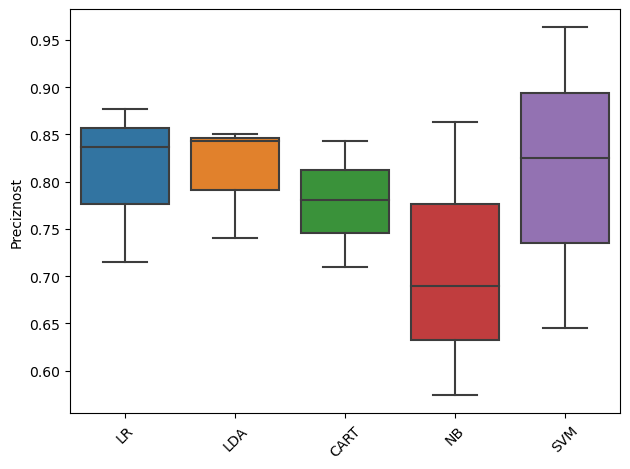

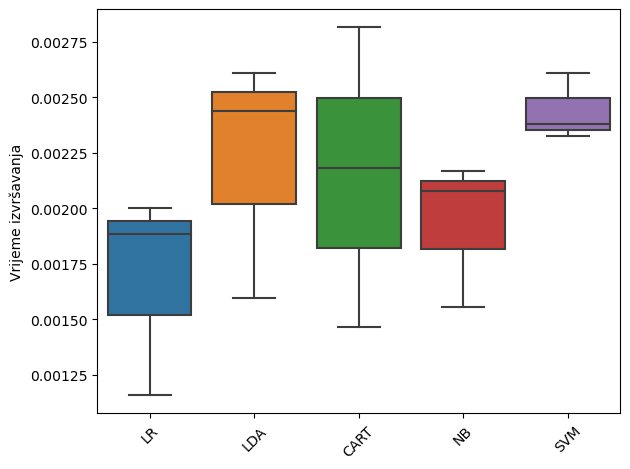

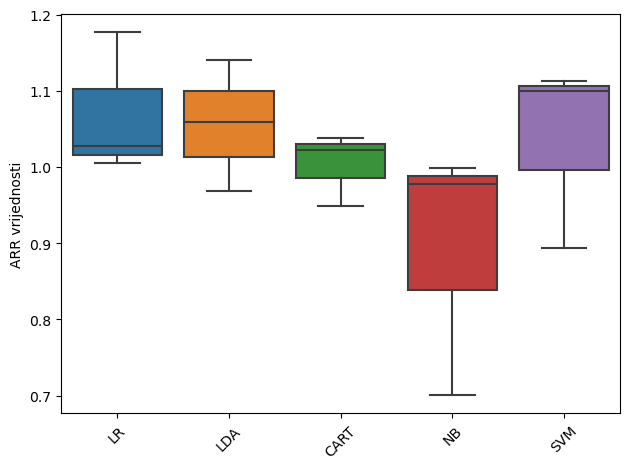

In [7]:
graph_alg_perf_data = list(alg_perf_data.values())
graph_alg_time_data = list(alg_time_data.values())
graph_alg_labels = list(alg_perf_data.keys())
graph_alg_arr_data = list(alg_arr_values_list.values())

sb.boxplot(data=graph_alg_perf_data)
plt.xticks(range(len(graph_alg_labels)), graph_alg_labels, rotation=45)
plt.ylabel('Preciznost')
plt.tight_layout() 
plt.show()

sb.boxplot(data=graph_alg_time_data)
plt.xticks(range(len(graph_alg_labels)), graph_alg_labels, rotation=45)
plt.ylabel('Vrijeme izvršavanja')
plt.tight_layout() 
plt.show()

sb.boxplot(data=graph_alg_arr_data)
plt.xticks(range(len(graph_alg_labels)), graph_alg_labels, rotation=45)
plt.ylabel('ARR vrijednosti')
plt.tight_layout()
plt.show()

## Pravljenje meta-modela za predikciju algoritama strojnog učenja

### Korištenje ručnih skupova podataka za meta-model

In [8]:
from MtLModelAnalysis import *
from pmlb import fetch_data, classification_dataset_names

preprocessed_datasets, target_variable_names = init_datasets()
algoritmi = load_algorithms()

mfe_categories = ["general", "statistical", "info-theory", "model-based", "landmarking"]

alg_performances = []

for X, y in preprocessed_datasets:
    perforanseAlg = izracunaj_performanse_norm(X, y, algoritmi)
    alg_performances.append(perforanseAlg)

alg_arr_values = []

for dataset_alg_performance in alg_performances:
    alg_arr_value = izracunaj_ARR(dataset_alg_performance)
    alg_arr_values.append(alg_arr_value)

alg_arr_values

[{'LR': 1.0436554744917523,
  'LDA': 1.0265984063748104,
  'CART': 0.9624186033219806,
  'NB': 1.0690834589289318,
  'SVM': 0.9240076437937691},
 {'LR': 1.0480611802730873,
  'LDA': 1.0091631459834294,
  'CART': 0.9488795596593234,
  'NB': 0.9864588924776883,
  'SVM': 1.012177187069275},
 {'LR': 1.0471228913757744,
  'LDA': 1.0358353022433382,
  'CART': 0.8794724645786072,
  'NB': 1.0321356983197894,
  'SVM': 1.0223364086382039},
 {'LR': 1.0607720899028443,
  'LDA': 1.03466288904639,
  'CART': 1.0100306379987283,
  'NB': 0.8207510771226999,
  'SVM': 1.118298796064948},
 {'LR': 1.0879904540003127,
  'LDA': 1.0777381364913878,
  'CART': 0.9811176927437969,
  'NB': 0.8350730981294301,
  'SVM': 1.0577547544072516},
 {'LR': 1.059147184859444,
  'LDA': 1.0303181581175398,
  'CART': 0.8942064286837614,
  'NB': 0.9551126245528052,
  'SVM': 1.0815286551145444}]

In [9]:
best_algorithms = []

for arr_values in alg_arr_values:
    best_algorithm = max(arr_values, key=arr_values.get)
    best_value = arr_values[best_algorithm]
    best_algorithms.append({best_algorithm: best_value})

meta_knowledge_mfe = []

for (X, y), best_algo in zip(preprocessed_datasets, best_algorithms):
    dataset_metafeatures = []
    
    for category in mfe_categories:
        mfe = MFE(groups=category, summary=["median"])
        metafeatures = compute_metafeatures(X.to_numpy(), y, mfe)
        for key, value in metafeatures.items():
            if np.isnan(value):
                metafeatures[key] = 0
        dataset_metafeatures.append(metafeatures)
    
    dataset_metafeatures.append({"bestAlg": list(best_algo.keys())[0]})
    meta_knowledge_mfe.append(dataset_metafeatures)

meta_knowledge_mfe

c:\Users\Rajan\Anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\Rajan\Anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\Rajan\Anaconda3\Lib\site-packages\pymfe\statistical.py:1267: RuntimeWarning: invalid value encountered in log
  np.log(np.linalg.det(S_i)) for S_i in sample_cov_matrices
c:\Users\Rajan\Anaconda3\Lib\site-packages\pymfe\statistical.py:1272: RuntimeWarning: invalid value encountered in log
  * np.log(np.linalg.det(pooled_cov_mat))
c:\Users\Rajan\Anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was ren

[[{'attr_to_inst': 0.0048,
   'cat_to_num': 0.0,
   'freq_class.median': 0.5,
   'inst_to_attr': 208.33333333333334,
   'nr_attr': 12,
   'nr_bin': 0,
   'nr_cat': 0,
   'nr_class': 2,
   'nr_inst': 2500,
   'nr_num': 12,
   'num_to_cat': 0},
  {'can_cor.median': 0.7691532244226179,
   'cor.median': 0.34466101978818076,
   'cov.median': 2.231076083055704,
   'eigenvalues.median': 0.3825150505614213,
   'g_mean.median': 113.30173284954277,
   'gravity': 6566.198757610276,
   'h_mean.median': 112.67933381304006,
   'iq_range.median': 14.943987499999988,
   'kurtosis.median': 0.02389538224832033,
   'lh_trace': 1.4485599344870363,
   'mad.median': 10.932025229999995,
   'max.median': 154.4812,
   'mean.median': 113.91831174000001,
   'median.median': 113.34365,
   'min.median': 76.66024999999999,
   'nr_cor_attr': 0.42424242424242425,
   'nr_disc': 1,
   'nr_norm': 0.0,
   'nr_outliers': 12,
   'p_trace': 0.59159668263971,
   'range.median': 77.82095,
   'roy_root': 1.4485599344870363,
  

#### Računanje meta-značajki za ciljne skupove podataka

In [10]:
# Izračunaj sve grupe meta-značajki za svaki skup podataka
target_datasets_metafeatures = []
metafeature_group_values = []
alg_performances = []

for dataset_name in dataset_names:
    metafeature_group_values = []

    X, y = fetch_data(dataset_name, return_X_y=True)
    for category in mfe_categories:
        mfe = MFE(groups=category, summary=["median"])
        metafeatures = compute_metafeatures(X, y, mfe)
        for key, value in metafeatures.items():
            if np.isnan(value):
                metafeatures[key] = 0
        metafeature_group_values.append(metafeatures)
    
    target_datasets_metafeatures.append(metafeature_group_values)

target_datasets_metafeatures

c:\Users\Rajan\Anaconda3\Lib\site-packages\pymfe\_internal.py:1568: UserWarning: It is not possible make equal discretization
  warnings.warn("It is not possible make equal discretization")
c:\Users\Rajan\Anaconda3\Lib\site-packages\pymfe\_internal.py:1568: UserWarning: It is not possible make equal discretization
  warnings.warn("It is not possible make equal discretization")
c:\Users\Rajan\Anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\Rajan\Anaconda3\Lib\site-packages\pymfe\statistical.py:1267: RuntimeWarning: invalid value encountered in log
  np.log(np.linalg.det(S_i)) for S_i in sample_cov_matrices
c:\Users\Rajan\Anaconda3\Lib\site-packages\pymfe\statistical.py:1272: RuntimeWarning: invalid value encountered in log
  * np.log(np.linalg.det(pooled_cov_mat))
c:\User

[[{'attr_to_inst': 0.2619047619047619,
   'cat_to_num': 0.0,
   'freq_class.median': 0.5,
   'inst_to_attr': 3.8181818181818183,
   'nr_attr': 11,
   'nr_bin': 10,
   'nr_cat': 0,
   'nr_class': 2,
   'nr_inst': 42,
   'nr_num': 11,
   'num_to_cat': 0},
  {'can_cor.median': 0.6821251204487752,
   'cor.median': 0.11322770341445948,
   'cov.median': 0.020905923344947737,
   'eigenvalues.median': 0.14283322773048968,
   'g_mean.median': 0.0,
   'gravity': 1.5397346785537753,
   'h_mean.median': 0.0,
   'iq_range.median': 1.0,
   'kurtosis.median': 0.32130352140856466,
   'lh_trace': 0.8701889854048186,
   'mad.median': 0.0,
   'max.median': 1.0,
   'mean.median': 0.3333333333333333,
   'median.median': 0.0,
   'min.median': 0.0,
   'nr_cor_attr': 0.0,
   'nr_disc': 1,
   'nr_norm': 0.0,
   'nr_outliers': 6,
   'p_trace': 0.46529467994725604,
   'range.median': 1.0,
   'roy_root': 0.8701889854048186,
   'sd.median': 0.4771187236136979,
   'sd_ratio': 0,
   'skewness.median': 1.520515128091

In [11]:
algorithm_names = [meta[-1]["bestAlg"] for meta in meta_knowledge_mfe]
label_encoder = LabelEncoder()
encoded_algo_names = label_encoder.fit_transform(algorithm_names)

scaler = StandardScaler()
classifiers = {}

for i, category in enumerate(mfe_categories):
    X_meta = [meta[i] for meta in meta_knowledge_mfe]
    y_meta = encoded_algo_names

    meta_df = pd.DataFrame(X_meta)
    X_meta_np = meta_df.to_numpy()

    X_meta_scaled = scaler.fit_transform(np.array(X_meta_np))
    
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_meta_scaled ,y_meta)
    
    classifiers[category] = rf

classifiers

{'general': RandomForestClassifier(random_state=42),
 'statistical': RandomForestClassifier(random_state=42),
 'info-theory': RandomForestClassifier(random_state=42),
 'model-based': RandomForestClassifier(random_state=42),
 'landmarking': RandomForestClassifier(random_state=42)}

In [12]:
all_predictions = []

for dataset_metafeatures in target_datasets_metafeatures:
    dataset_predictions = {}
    
    for dataset_group_mfe, category in zip(dataset_metafeatures, mfe_categories):
        valuesNp = np.array(list(dataset_group_mfe.values())).reshape(1, -1)
        rf = classifiers[category]
        predicted_indices = rf.predict(valuesNp)
        predicted_algorithm_name = label_encoder.inverse_transform(predicted_indices)[0]
        dataset_predictions[category] = predicted_algorithm_name
    
    all_predictions.append(dataset_predictions)
    
all_predictions

[{'general': 'LR',
  'statistical': 'LR',
  'info-theory': 'LR',
  'model-based': 'LR',
  'landmarking': 'LR'},
 {'general': 'LR',
  'statistical': 'LR',
  'info-theory': 'NB',
  'model-based': 'LR',
  'landmarking': 'LR'},
 {'general': 'LR',
  'statistical': 'LR',
  'info-theory': 'LR',
  'model-based': 'NB',
  'landmarking': 'LR'}]